In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
file_path = "../scraper/scraped_data/data_selenium.json"
# Load JSON file
with open(file_path) as file:
    data = json.load(file)

In [32]:
# Convert to pandas dataframe
df = pd.DataFrame(data)
df.head()

,url,title,texts,images,pdf_links,pdf_extracted,image_extracted
0,https://www.svf.gov.lk/index.php?lang=en,Shrama Vasana Fund - Home,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
1,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Overview,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
2,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Contributions,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
3,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Services,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[],{},{'https://www.svf.gov.lk/images/homeicon.png':...
4,https://www.svf.gov.lk/index.php?option=com_co...,Shrama Vasana Fund - Downloads,"[Menu, About Us, Contributions, Services, Down...","[https://www.svf.gov.lk/images/homeicon.png, h...",[https://www.svf.gov.lk/images/pdfs/act_en.pdf...,{'https://www.svf.gov.lk/images/pdfs/act_en.pd...,{'https://www.svf.gov.lk/images/homeicon.png':...


In [33]:
print(f"Count of unique urls: {df['url'].nunique()}")
print(f"Count of unique titles: {df['title'].nunique()}")

texts = [text for sublist in df['texts'] for text in sublist]
unique_texts = set(texts)
print(f"Count of unique texts: {len(unique_texts)}")

images = [image for sublist in df['images'] for image in sublist]
unique_images = set(images)
print(f"Count of unique images: {len(unique_images)}")

pdf_links = [pdf for sublist in df['pdf_links'] for pdf in sublist]
unique_pdfs = set(pdf_links)
print(f"Count of unique pdfs: {len(unique_pdfs)}")


Count of unique urls: 14
Count of unique titles: 14
Count of unique texts: 381
Count of unique images: 79
Count of unique pdfs: 15


In [34]:
def count_words(phrases_list): 
    word_count = 0 
    for phrase in phrases_list: 
        word_count += len(phrase.split())
    return word_count

print(f"Word count of all texts: {count_words(texts)}")

Word count of all texts: 5308


In [35]:
def plot_word_cloud(texts):
    combined_text = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

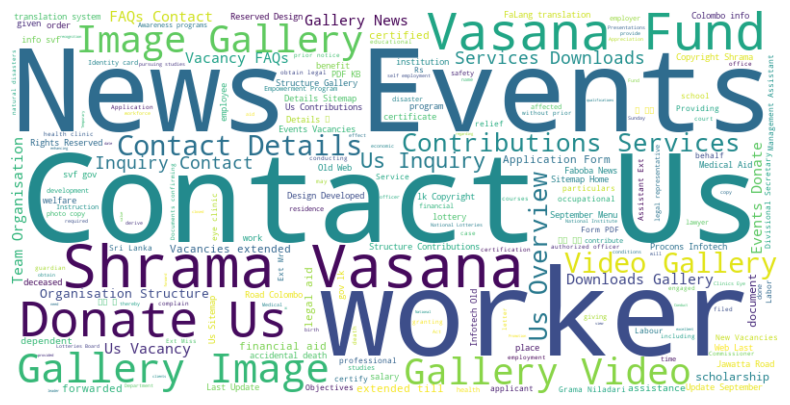

In [36]:
# Plot word cloud for texts
plot_word_cloud(texts)

Words like News and Events, Contact Us, Donate Us and Shrama Vasana Fund have higher frequency compared to the rest. This is because they are included in the navigation bar of every web page and could affect model training. The words in the navigation bar should be removed during the pre-processing stage.

In [37]:
# store extracted texts from pdf as list
extracted_texts_pdf = []
for dict in df['pdf_extracted']: 
    extracted_texts_pdf.append(list(dict.values()))


pdf_texts = [text for sublist in extracted_texts_pdf for text in sublist]


In [38]:
print(f"Word count of all pdf_texts: {count_words(pdf_texts)}")

Word count of all pdf_texts: 8377


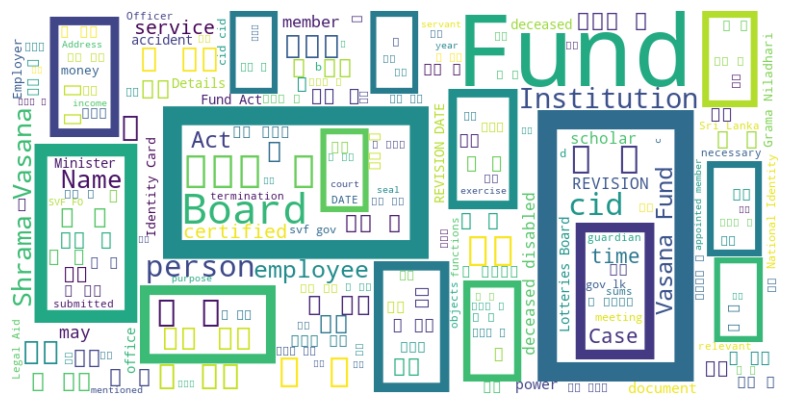

In [39]:
# Plot word cloud for pdf texts
plot_word_cloud(pdf_texts)

Here we notice that the extracted pdf texts contains many non-english characters which should be pre-processed in the data pre-processing stage.

In [40]:
extracted_texts_images = []
for dict in df['image_extracted']: 
    extracted_texts_images.append(list(dict.values()))


image_texts = [text for sublist in extracted_texts_images for text in sublist]

In [41]:
print(f"Word count of all image_texts: {count_words(image_texts)}")

Word count of all image_texts: 248


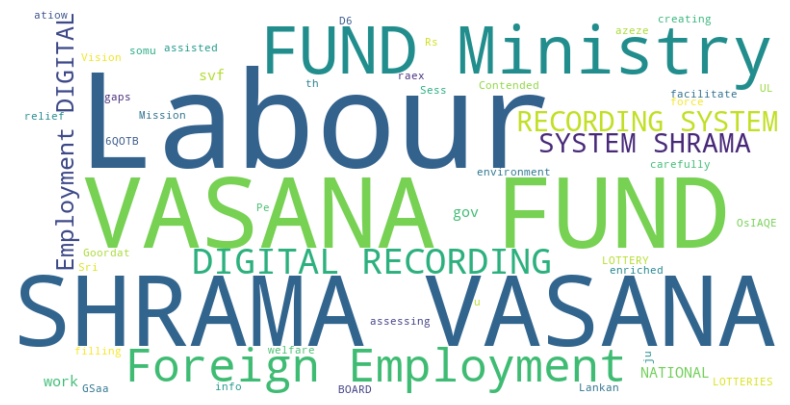

In [42]:
# Plot word cloud for image texts
plot_word_cloud(image_texts)

In [43]:
def get_top_words(text, num_words):
  CV = CountVectorizer(stop_words='english') # may not work well to remove stop words for Sinhala language (affect extracted pdf texts)
  word_count = CV.fit_transform(text)

  word_sum = word_count.sum(axis=0)

  frequency = []
  for word, index in CV.vocabulary_.items():
    frequency.append((word, word_sum[0, index]))

  frequency = sorted(frequency, key=lambda x: x[1], reverse=True)[:num_words]
  return frequency

In [44]:
# Top 10 most frequently used texts
get_top_words(texts, 10)

[('gallery', 108),
 ('contact', 79),
 ('aid', 52),
 ('2024', 49),
 ('shrama', 45),
 ('services', 44),
 ('news', 43),
 ('events', 43),
 ('workers', 42),
 ('vasana', 42)]

In [45]:
# Top 10 most frequently used pdf texts

get_top_words(pdf_texts, 10)

[('කර', 107),
 ('fund', 82),
 ('සහත', 58),
 ('කය', 55),
 ('shall', 53),
 ('board', 53),
 ('කම', 49),
 ('නය', 44),
 ('cid', 44),
 ('පත', 42)]

In [46]:
# Top 10 most frequently used image texts

get_top_words(image_texts, 10)

[('shrama', 14),
 ('vasana', 14),
 ('fund', 14),
 ('ministry', 14),
 ('labour', 14),
 ('foreign', 14),
 ('employment', 14),
 ('digital', 14),
 ('recording', 14),
 ('work', 2)]